In [1]:
#@title Setup
from google.colab import output

nvidia_output = !nvidia-smi --query-gpu=memory.total --format=noheader,nounits,csv
gpu_memory = int(nvidia_output[0])
if gpu_memory < 14000:
  output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')
  warning_string = f"--> GPU check: ONLY {gpu_memory} MiB available: Please use low quality or low res <--"
  print(warning_string)
  output.eval_js('alert("Warning - low GPU (see message)")')
else:
  print(f"GPU check: {gpu_memory} MiB available: this should be fine")

from IPython.utils import io
with io.capture_output() as captured:
  !pip install torch==1.9.0+cu102 torchtext==0.10.0 torchvision==0.10.0+cu102 torch-optimizer==0.1.0 -f https://download.pytorch.org/whl/torch/ -f https://download.pytorch.org/whl/torchvision/
  !git clone https://github.com/openai/CLIP
  # !pip install taming-transformers
  !git clone https://github.com/CompVis/taming-transformers.git
  !rm -Rf clipit
  !git clone https://github.com/mfrashad/clipit.git
  !pip install ftfy regex tqdm omegaconf pytorch-lightning
  !pip install kornia==0.6.1
  !pip install imageio-ffmpeg
  !pip install einops
  !pip install torch-optimizer
  !pip install easydict
  !pip install braceexpand
  !pip install git+https://github.com/pvigier/perlin-numpy

  # ClipDraw deps
  !pip install svgwrite
  !pip install svgpathtools
  !pip install cssutils
  !pip install numba
  !pip install torch-tools
  !pip install visdom

  !pip install gradio==2.3.7

  !git clone https://github.com/BachiLi/diffvg
  %cd diffvg
  # !ls
  !git submodule update --init --recursive
  !python setup.py install
  %cd ..

  !mkdir -p steps
  !mkdir -p models

output.clear()
import sys
sys.path.append("clipit")

result_msg = "setup complete"
import IPython
import os
if not os.path.isfile("first_init_complete"):
  # put stuff in here that should only happen once
  !mkdir -p models
  os.mknod("first_init_complete")
  result_msg = "Please choose Runtime -> Restart Runtime from the menu, and then run Setup again"

js_code = f'''
document.querySelector("#output-area").appendChild(document.createTextNode("{result_msg}"));
'''
js_code += '''
for (rule of document.styleSheets[0].cssRules){
  if (rule.selectorText=='body') break
}
rule.style.fontSize = '30px'
'''
display(IPython.display.Javascript(js_code))

<IPython.core.display.Javascript object>

  and should_run_async(code)



Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from models/vqgan_imagenet_f16_16384.ckpt
Using device: cuda:0
Optimising using: Adam
Using text prompts: ['(Black-and-white stick figure image) A young boy playing with a large, happy tree. He wears a crown of leaves and acts like the king of the forest.']
Using seed: 6338132182257606710


0it [00:00, ?it/s]

iter: 0, loss: 0.994137, losses: 0.994137


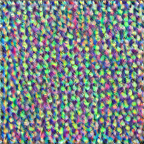

iter: 10, loss: 0.844155, losses: 0.844155
iter: 20, loss: 0.817333, losses: 0.817333


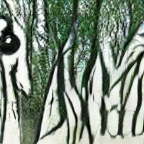

iter: 30, loss: 0.760913, losses: 0.760913
iter: 40, loss: 0.779447, losses: 0.779447


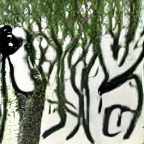

iter: 50, loss: 0.746445, losses: 0.746445
iter: 60, loss: 0.760144, losses: 0.760144


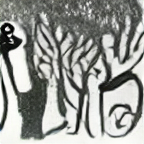

iter: 70, loss: 0.752419, losses: 0.752419
iter: 80, loss: 0.746337, losses: 0.746337


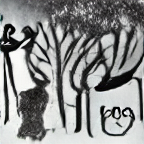

iter: 90, loss: 0.704076, losses: 0.704076
iter: 100, loss: 0.710879, losses: 0.710879


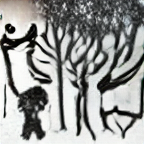

iter: 110, loss: 0.700784, losses: 0.700784
iter: 120, loss: 0.673955, losses: 0.673955


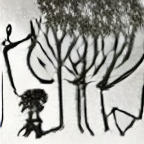

iter: 130, loss: 0.704631, losses: 0.704631
iter: 140, loss: 0.711443, losses: 0.711443


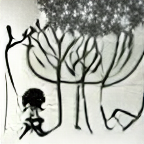

iter: 150, loss: 0.66214, losses: 0.66214
iter: 160, loss: 0.665415, losses: 0.665415


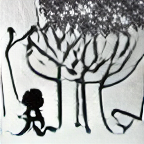

iter: 170, loss: 0.691869, losses: 0.691869
iter: 180, loss: 0.66303, losses: 0.66303


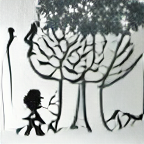

iter: 190, loss: 0.706899, losses: 0.706899
iter: 200, loss: 0.690626, losses: 0.690626


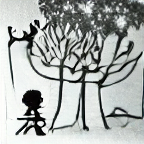

In [3]:
#@title VQGAN + CLIP
import clipit
# To reset settings to default
clipit.reset_settings()
# You can use "|" to separate multiple prompts
prompts = "(Black-and-white stick figure image) A young boy playing with a large, happy tree. He wears a crown of leaves and acts like the king of the forest."
# You can trade off speed for quality: draft, normal, better, best
quality = "draft"
# Aspect ratio: widescreen, square
aspect = "square"
# Add settings
clipit.add_settings(prompts=prompts, quality=quality, aspect=aspect)
# Apply these settings and run
settings = clipit.apply_settings()
clipit.do_init(settings)
clipit.do_run(settings)